# Facebook API Data Exercise

### Data Preprocessing

Let's pull fan data from the Nike Facebook page via the Facebook API. The suggested query pulls the number of fans by country from July 2015 to September 2015. We will import the **requests** and **json** modules to extract and load the desired data.  

In [1]:
import pandas as pd
from pandas import Series, DataFrame

import requests
import json

import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://graph.facebook.com/v2.3/nike/insights/page_fans_country?since=1435734000&until=1443596400'
parameters = {'access_token': 'EAACEdEose0cBANKea2D4aYymqt858oqjnHectgSTyDOT9l1FYZCJiXN3TO7lYIBF57FDiXyR03ikpZAMTDe9dc0SvWRweiZAZBHtvTig9UCKeDRrAJfWdTVD6GZCWoX4PhnpPKVmSVZAm2A1Ob8tZAB2nQRnFZCvsvST6plYol7BpgZDZD'}
r = requests.get(url, params = parameters)
result = json.loads(r.text)
result

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by country, about the people who like your Page. (Unique Users)',
   'id': '15087023444/insights/page_fans_country/lifetime',
   'name': 'page_fans_country',
   'period': 'lifetime',
   'title': 'Lifetime Likes by Country',
   'values': [{'end_time': '2015-07-02T07:00:00+0000',
     'value': {'AR': 765565,
      'AU': 240761,
      'BA': 91755,
      'BD': 130991,
      'BG': 137118,
      'BR': 1230253,
      'CA': 229560,
      'CL': 380205,
      'CO': 416882,
      'CZ': 165767,
      'DE': 537601,
      'DZ': 250947,
      'EC': 177870,
      'EG': 403348,
      'ES': 177529,
      'FR': 431021,
      'GB': 423912,
      'GR': 209036,
      'HR': 113317,
      'HU': 119625,
      'ID': 398774,
      'IL': 98545,
      'IN': 1116460,
      'IR': 175383,
      'IT': 474927,
      'MA': 181475,
      'MX': 1505824,
      'MY': 478083,
      'PE': 382260,
      'PH': 1005100,
      'PK': 170315,
      'PL':

Once we have dumped our raw data into a Python dictionary, let's take steps to isolate the segment of the data that we actually care about - the number of fans per country over time.

In [2]:
# result['data'][0]['values']

Next, let's reshape the data for clarity. I felt it was more natural to view the data with the date acting as the key, mapping to a nested dictionary with each country mapping to their respective number of fans. Let's load this transformed dataset into a **pandas DataFrame** for ease of analysis.

In [3]:
data = {r['end_time']:r['value'] for r in result['data'][0]['values']}
data

{'2015-07-02T07:00:00+0000': {'AR': 765565,
  'AU': 240761,
  'BA': 91755,
  'BD': 130991,
  'BG': 137118,
  'BR': 1230253,
  'CA': 229560,
  'CL': 380205,
  'CO': 416882,
  'CZ': 165767,
  'DE': 537601,
  'DZ': 250947,
  'EC': 177870,
  'EG': 403348,
  'ES': 177529,
  'FR': 431021,
  'GB': 423912,
  'GR': 209036,
  'HR': 113317,
  'HU': 119625,
  'ID': 398774,
  'IL': 98545,
  'IN': 1116460,
  'IR': 175383,
  'IT': 474927,
  'MA': 181475,
  'MX': 1505824,
  'MY': 478083,
  'PE': 382260,
  'PH': 1005100,
  'PK': 170315,
  'PL': 639133,
  'PT': 206393,
  'PY': 90000,
  'RO': 174314,
  'RS': 297847,
  'TH': 288597,
  'TN': 160248,
  'TR': 710743,
  'TW': 308067,
  'US': 3582637,
  'UY': 113963,
  'VE': 168532,
  'VN': 141943,
  'ZA': 93070},
 '2015-07-03T07:00:00+0000': {'AR': 765723,
  'AU': 240782,
  'BA': 91751,
  'BD': 131098,
  'BG': 137128,
  'BR': 1230653,
  'CA': 229579,
  'CL': 380212,
  'CO': 417000,
  'CZ': 165775,
  'DE': 537791,
  'DZ': 251201,
  'EC': 177948,
  'EG': 403619

In [4]:
df = DataFrame(data).T
df

,AR,AU,BA,BD,BG,BR,CA,CL,CO,CZ,...,RS,TH,TN,TR,TW,US,UY,VE,VN,ZA
2015-07-02T07:00:00+0000,765565,240761,91755,130991,137118,1230253,229560,380205,416882,165767,...,297847,288597,160248,710743,308067,3582637,113963,168532,141943,93070
2015-07-03T07:00:00+0000,765723,240782,91751,131098,137128,1230653,229579,380212,417000,165775,...,297970,288836,160323,710850,308050,3582905,113967,168618,142029,93174
2015-07-04T07:00:00+0000,765815,240788,91738,131184,137141,1230917,229624,380235,417119,165742,...,298165,289066,160380,710967,308061,3583205,113974,168639,142093,93227
2015-07-05T07:00:00+0000,765900,240908,91720,131219,137136,1231117,229597,380264,417177,165724,...,298341,289312,160441,711060,308060,3583421,113951,168651,142128,93260
2015-07-06T07:00:00+0000,765984,241009,91762,131309,137165,1231334,229636,380331,417252,165722,...,298443,289563,160573,711154,308082,3583794,113950,168690,142140,93340
2015-07-07T07:00:00+0000,766100,241093,91770,131352,137180,1231672,229654,380377,417316,165699,...,290835,289804,160657,711264,308092,3584254,113949,168710,142175,93429
2015-07-08T07:00:00+0000,766222,241136,91748,131368,137192,1232039,229715,380393,417449,165636,...,290367,290015,160711,711407,308093,3597693,113928,168714,142190,93535
2015-07-09T07:00:00+0000,766250,241212,91756,131400,137214,1232171,229762,380371,417500,165619,...,290148,290195,160801,711352,308086,3601464,113922,168750,142200,93660
2015-07-10T07:00:00+0000,766317,241283,91752,131477,137218,1232298,229782,380381,417523,165623,...,290149,290368,160844,711500,308085,3601865,113914,168758,142197,93769
2015-07-11T07:00:00+0000,766356,241340,91742,131517,137221,1232454,229813,380392,417600,165628,...,290140,290602,160927,711600,308105,3602195,113917,168776,142231,93879


Let's try to get an idea of the dataset's variance over time. Sort the standard deviation of each country in descending order.

In [5]:
# df.info()
df.describe()

,AR,AU,BA,BD,BG,BR,CA,CL,CO,CZ,...,RS,TH,TN,TR,TW,US,UY,VE,VN,ZA
count,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000
mean,769069.461538,244898.670330,92063.560440,131048.923077,137603.483516,1.240997e+06,231648.890110,381445.219780,420033.076923,166056.087912,...,282310.142857,297263.978022,162414.978022,714704.153846,307412.769231,3.644037e+06,113862.868132,169775.604396,143023.637363,97027.065934
std,10495.852036,2451.180151,269.758254,1576.527473,255.158050,5.954201e+03,1646.161538,3808.488837,8229.043799,433.266396,...,4663.160946,4589.125104,873.313485,2947.667300,434.580464,2.527608e+04,588.036624,3784.298461,446.721502,1951.559011
min,765565.000000,240761.000000,91716.000000,127892.000000,137118.000000,1.230253e+06,229560.000000,380146.000000,416882.000000,165566.000000,...,279041.000000,288597.000000,160248.000000,710743.000000,306872.000000,3.582637e+06,113293.000000,168532.000000,141943.000000,93070.000000
25%,766351.000000,242724.000000,91837.000000,129843.000000,137419.000000,1.236216e+06,230255.500000,380379.000000,417829.500000,165623.500000,...,279486.000000,293560.000000,162083.500000,711970.500000,307028.500000,3.636192e+06,113630.000000,168789.000000,142782.500000,95547.500000
50%,766656.000000,245230.000000,91982.000000,131545.000000,137600.000000,1.242004e+06,231256.000000,380522.000000,418217.000000,165969.000000,...,281559.000000,297594.000000,162581.000000,714316.000000,307336.000000,3.650011e+06,113792.000000,168923.000000,143161.000000,97571.000000
75%,766818.500000,247238.000000,92300.500000,132351.500000,137816.500000,1.245136e+06,232941.500000,380661.000000,418366.000000,166529.000000,...,282052.500000,301092.500000,163171.500000,717653.500000,307806.500000,3.663677e+06,113913.500000,168966.500000,143405.000000,98845.500000
max,812427.000000,248445.000000,92590.000000,132829.000000,137986.000000,1.254099e+06,234840.000000,397157.000000,453969.000000,166773.000000,...,298443.000000,305080.000000,163548.000000,719584.000000,308135.000000,3.681193e+06,116199.000000,185389.000000,143522.000000,99278.000000


In [6]:
df.std().sort_values(ascending=False)

MX    31465.765666
US    25276.076647
AR    10495.852036
PH     9116.963801
CO     8229.043799
PE     7748.516867
BR     5954.200785
RS     4663.160946
TH     4589.125104
EG     4511.666662
DE     4183.339246
FR     4116.268650
EC     3939.141182
CL     3808.488837
VE     3784.298461
IN     3448.789273
IT     2998.219343
GB     2985.568486
TR     2947.667300
AU     2451.180151
MY     2315.551404
ID     2130.793982
DZ     2050.090425
ZA     1951.559011
MA     1675.084153
CA     1646.161538
ES     1631.126293
BD     1576.527473
PY     1265.968401
PK     1049.930061
TN      873.313485
HR      865.888651
GR      779.200559
PT      755.328348
PL      731.262944
UY      588.036624
RO      517.713904
IL      462.399045
VN      446.721502
TW      434.580464
CZ      433.266396
IR      376.273263
HU      273.660494
BA      269.758254
BG      255.158050
dtype: float64

# Data Visualization

### Overall Trend in the Number of Fans

Let's see how the total number of fans have changed over time.

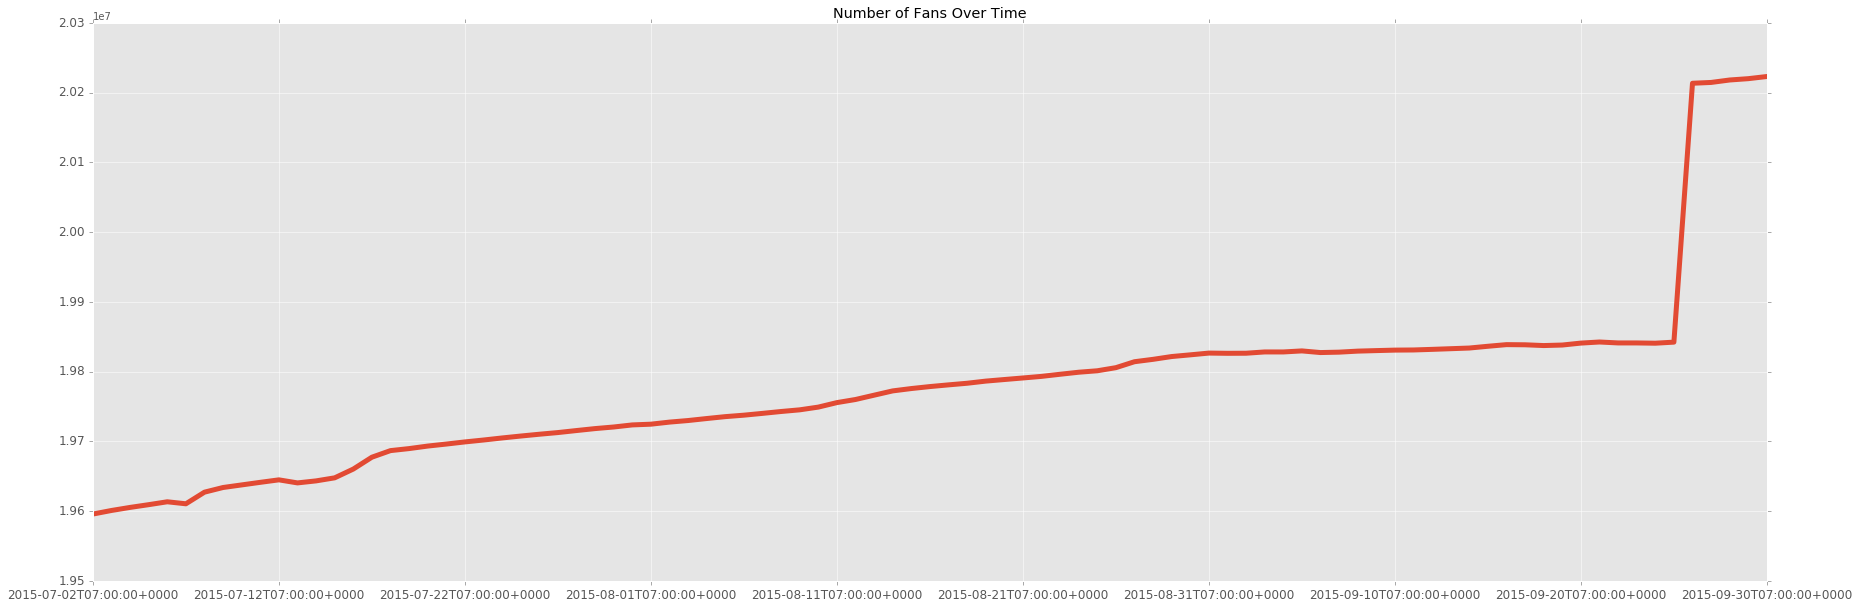

In [7]:
plt.style.use('ggplot')
df.sum(axis=1).plot(title='Number of Fans Over Time', 
                    figsize=(30,10),
                    fontsize='12', 
                    linewidth=5)

It looks like there was a spike in new Facebook fans during the **second half of September 2015**. We'll investigate this more later. First, let's see how these fans are distributed on average.

### Average Number of Fans by Country from July to September 2015

There are a ton of countries so trying to include all of them in our graph would be counterproductive. Let's take a look at the major contributers and bucket the minor ones into a newly created 'Other' category. The distiction between major and minor is determined by adjusting the threshold variable.

In [8]:
avg_fans = df.mean()
avg_fans_pct = avg_fans / avg_fans.sum()
threshold = 0.02
major_only = avg_fans_pct[avg_fans_pct > threshold]
other = avg_fans_pct[avg_fans_pct <= threshold].sum()
major_only['Other'] = other
major_only.sort_values(ascending=False)

Other    0.278403
US       0.184236
MX       0.076697
BR       0.062743
IN       0.056714
PH       0.051613
AR       0.038883
TR       0.036134
PL       0.032396
DE       0.027507
MY       0.024356
IT       0.024238
FR       0.022034
GB       0.021628
CO       0.021236
EG       0.020804
ID       0.020377
dtype: float64

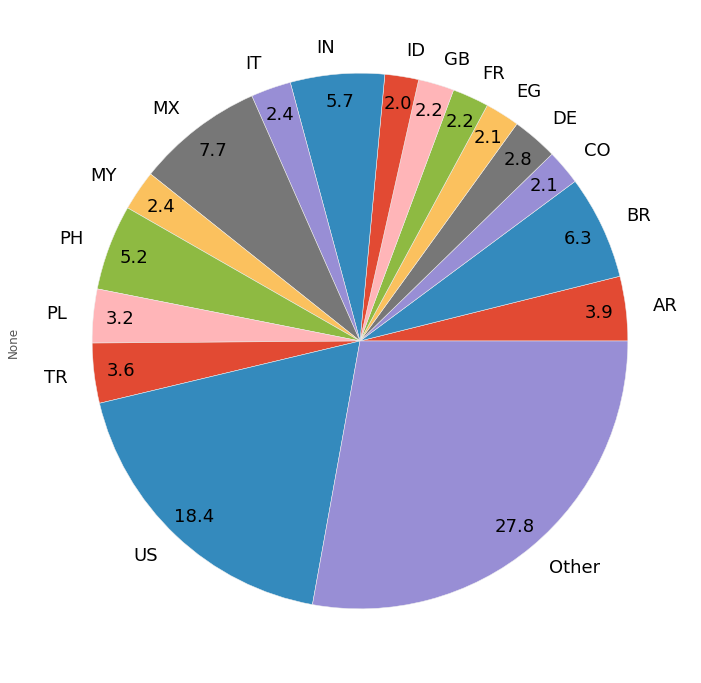

In [9]:
plt.style.use('ggplot')
major_only.plot.pie(autopct='%.1f', fontsize=18, pctdistance=0.90, figsize=(12, 12))

### Fans by Country from July to September 2015

Now that we have an idea of the average breakdown of Nike's fans by country, let's see if these demographics have changed over time.

In [10]:
big_countries = ['US', 'MX', 'BR', 'IN', 'PH', 'AR', 'TR', 'PL']
df_slim = df[big_countries]
df_other = df.ix[:, df.columns.difference(['US', 'MX', 'BR', 'IN', 'PH'])] # other columns
df_slim['Other'] = df_other.sum(axis=1)

/Users/hsu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


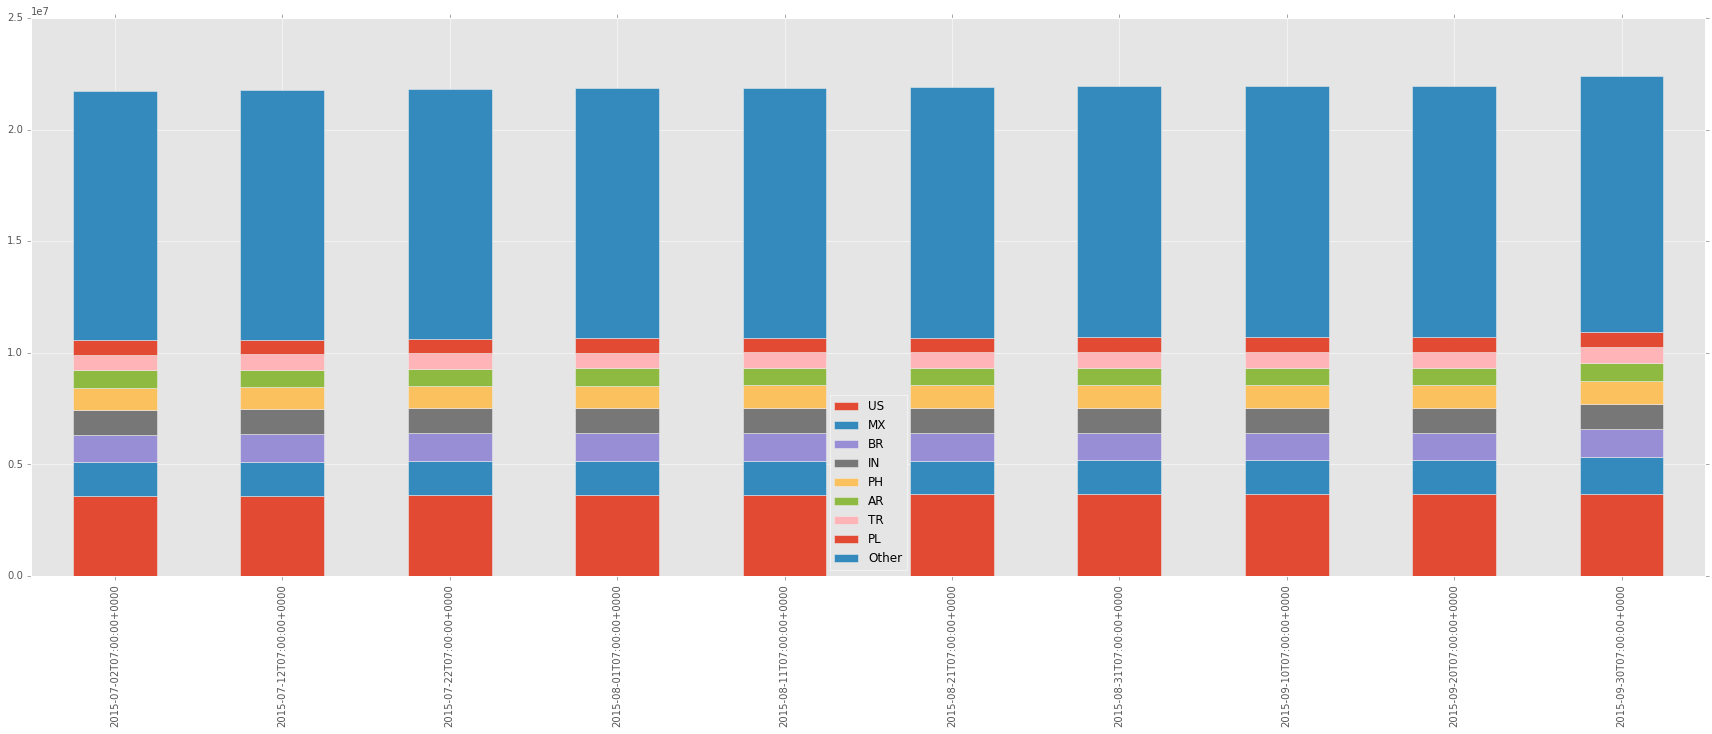

In [11]:
plt.style.use('ggplot')
df_slim[::10].plot(kind="bar", figsize=(30,10), stacked=True)

Judging from the stacked bar graph above, it doesn't look as if there are any major shifts in the distribution of fans from July 2015 to September 2015. Let's go back to taking a look at the spike in new fans from earlier and examine the countries with the highest variance. Since the US has the most number of fans by far, let's standardize our graph by plotting the **percent change** in fans rather than the absolute number of fans.

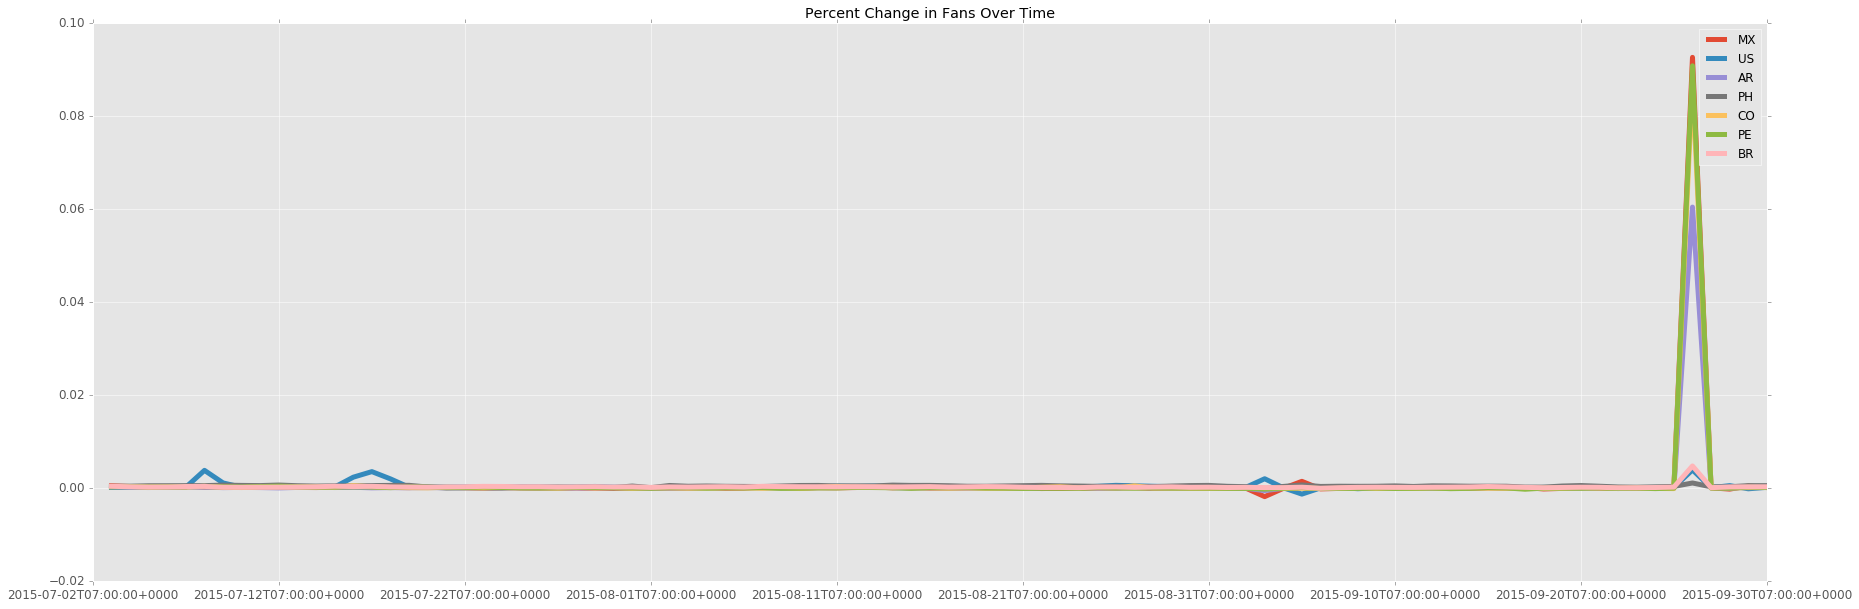

In [12]:
df[['MX', 'US', 'AR', 'PH', 'CO', 'PE', 'BR']].pct_change().plot(title='Percent Change in Fans Over Time', 
                                                                 figsize=(30,10),
                                                                 fontsize='12',
                                                                 linewidth=5)

The graph shows that there was a catalyst on September 25th, 2015 that led to a major increase in fans, especially those from South American countries. My initial search wasn't able to uncover what this event was.